# Problema coloración de regiones por CSF (_Constraint Satisfaction Framework_)

Para que este algoritmo funcione, es necesario instalar el módulo `simpleai` mediante el comando `pip install simpleai`. 

In [7]:
from simpleai.search import CspProblem, backtrack, min_conflicts
import time

# Abreviaciones departamentos
BQ = 'Barranquilla'
SD = 'Soledad'
PC = 'Puerto Colombia'
TB = 'Tubará'
GP = 'Galapa'
MB = 'Malambo'
SG = 'Sabanagrande'
BR = 'Baranoa'
PN = 'Polonuevo'
ST = 'Santo Tomás'
PV = 'Palmar de Varela'
PD = 'Ponedera'
CL = 'Candelaria'
CC = "Campo de la Cruz"
SN = 'Suán'
SU = 'Santa Lucía'
MT = 'Manatí'
RP = 'Repelón'
LR = 'Luruaco'
PJ = 'Piojó'
JA = 'Juan de Acosta'
US = 'Usiacurí'
SL = 'Sabanalarga'

# Definición de variables: "municipios"
variables = (BQ, SD, PC, TB, GP, MB, SG, BR, 
             PN, ST, PV, PD, CL, CC, SN, SU, 
             MT, RP, LR, PJ, JA, US, SL)

# Función de restricción para pares de ciudades.
def const_adj(variables, values) :
    return all(values[0] != x for x in values[1:])

restricciones = [((BQ, SD, PC, TB, GP), const_adj),
                 ((PC, BQ, TB), const_adj),
                 ((SD, BQ, MB), const_adj),
                 ((MB, BQ, SD, GP, SG, BR, PN), const_adj),
                 ((GP, BQ, SD, TB, MB, BR), const_adj),
                 ((TB, BQ, PC, GP, BR, JA), const_adj),
                 ((JA, TB, BR, PJ, US), const_adj),
                 ((PJ, LR, JA, US, SL), const_adj),
                 ((LR, RP, PJ, SL), const_adj),
                 ((RP, MT, LR, SL), const_adj),
                 ((MT, CL, CC, SU, RP, SL), const_adj),
                 ((SU, CC, SN, MT), const_adj),
                 ((SN, CC, SU), const_adj),
                 ((CC, PD, CL, MT, SN, SU), const_adj),
                 ((PD, PN, ST, PV, CL, CC, SL), const_adj),
                 ((PV, ST, PD), const_adj),
                 ((ST, SG, PN, PV), const_adj),
                 ((SG, MB, PN, ST), const_adj),
                 ((PN, MB, SG, BR, ST, PD, SL), const_adj),
                 ((BR, TB, GP, MB, PN, JA, US, SL), const_adj),
                 ((US, BR, PJ, JA, SL), const_adj),
                 ((CL, PN, CC, MT, SL), const_adj),
                 ((SL, BR, US, PJ, LR, RP, MT, CL, PD, PN), const_adj),
                ]

### Prueba con 4 colores (Backtracking).

In [21]:
# Dominios: lista de colores a usar
colores = ['red', 'green', 'blue', 'yellow']
# Asignación de dominios a variables
dominios = {municipio: colores for municipio in variables}

# Medición del tiempo de computo con backtracking
start = time.clock()
problema_1 = CspProblem(variables, dominios, restricciones)
resultado_1 = backtrack(problema_1)

print("Tiempo de ejecución del código CSP: {}".format(time.clock() - start))
print("\033[1mResultado obtenido para el problema coloración por regiones con {} colores: \033[0m".format(len(colores)))
print("\n".join("{}: {} - {}".format(list(resultado_1.keys()).index(k), k, v) for k, v in resultado_1.items()))

Tiempo de ejecución del código CSP: 51.76227249618364
Resultado obtenido para el problema coloración por regiones con 4 colores: 
0: Barranquilla - red
1: Soledad - green
2: Puerto Colombia - green
3: Tubará - blue
4: Galapa - yellow
5: Malambo - blue
6: Sabanagrande - red
7: Baranoa - red
8: Polonuevo - green
9: Santo Tomás - blue
10: Palmar de Varela - red
11: Ponedera - yellow
12: Candelaria - red
13: Campo de la Cruz - green
14: Suán - red
15: Santa Lucía - blue
16: Manatí - yellow
17: Repelón - red
18: Luruaco - green
19: Piojó - red
20: Juan de Acosta - green
21: Usiacurí - yellow
22: Sabanalarga - blue


### Prueba con 4 colores (Minimos conflictos).

Se utiliza otra técnica disponible en el módulo para CSP: _Min conflicts_ o "Minimos conflictos", el cual consiste en seleccionar el valor que resulte en un número mínimo de conflictos con otras variables. Esta prueba se realiza con el fin de determinar cual método (backtracking o Minimos conflictos) es más rápido en solucionar este problema.

In [22]:
start = time.clock()
problema_1 = CspProblem(variables, dominios, restricciones)
resultado_1 = min_conflicts(problema_1)

print("Tiempo de ejecución del código CSP: {}".format(time.clock() - start))
print("\033[1mResultado obtenido para el problema coloración por regiones con {} colores: \033[0m".format(len(colores)))
print("\n".join("{}: {} - {}".format(list(resultado_1.keys()).index(k), k, v) for k, v in resultado_1.items()))

Tiempo de ejecución del código CSP: 0.05458004637830527
Resultado obtenido para el problema coloración por regiones con 4 colores: 
0: Barranquilla - blue
1: Soledad - red
2: Puerto Colombia - green
3: Tubará - red
4: Galapa - green
5: Malambo - yellow
6: Sabanagrande - blue
7: Baranoa - blue
8: Polonuevo - green
9: Santo Tomás - yellow
10: Palmar de Varela - red
11: Ponedera - blue
12: Candelaria - red
13: Campo de la Cruz - green
14: Suán - red
15: Santa Lucía - yellow
16: Manatí - blue
17: Repelón - green
18: Luruaco - red
19: Piojó - blue
20: Juan de Acosta - green
21: Usiacurí - red
22: Sabanalarga - yellow


Como podemos observar, se llega muchisimo más rápido a la solución para este dominio en específico utilizando algoritmo de búsqueda de _Minimos conflictos_. 

### Prueba con 5 colores (Minimos conflictos).

Esta prueba tiene como fin analizar si el algoritmo del módulo es capaz de resolver el problema más rápido con mayor número de dominios. Desafortunadamente, el agregar un quinto color con una busqueda por backtracking (utilizando cualquier heruistica de la documentación) produce un cálculo el cual tarda demasiado a tal punto que se interrumpe su ejecución por falta de respuesta del programa. 

Realizando la misma prueba con "minimos conflictos", se logra llegar a una solución.

In [15]:
# Agrega un color y realiza la prueba de nuevo
colores = ['red', 'green', 'blue', 'yellow', 'orange']
dominios = {municipio: colores for municipio in variables}

# Repite el proceso con menos colores
start = time.clock()
problema_2 = CspProblem(variables, dominios, restricciones)
resultado_2 = min_conflicts(problema_2)

print("\nTiempo de ejecución del código CSP: {}".format(time.clock() - start))
print("\033[1mResultado obtenido para el problema coloración por regiones con {} colores: \033[0m".format(len(colores)))
print("\n".join("{} - {}".format(k, v) for k, v in resultado_2.items()))


Tiempo de ejecución del código CSP: 0.019667332439780694
Resultado obtenido para el problema coloración por regiones con 5 colores: 
Barranquilla - red
Soledad - blue
Puerto Colombia - yellow
Tubará - blue
Galapa - green
Malambo - orange
Sabanagrande - red
Baranoa - red
Polonuevo - yellow
Santo Tomás - orange
Palmar de Varela - yellow
Ponedera - red
Candelaria - blue
Campo de la Cruz - yellow
Suán - green
Santa Lucía - blue
Manatí - green
Repelón - yellow
Luruaco - green
Piojó - red
Juan de Acosta - yellow
Usiacurí - green
Sabanalarga - orange


### Prueba con 3 colores (Backtracking).

Para este caso, utilizando backtracking, el problema **NO** puede llegar a una solución debido a que el algoritmo se detiene cuando no puede encontrar satisfacer una sola restricción mediante el analisis de las alternativas, es decir, los árboles de búsqueda.

In [40]:
# Agrega un color y realiza la prueba de nuevo
colores = ['red', 'green', 'blue']
dominios = {municipio: colores for municipio in variables}

# Repite el proceso con menos colores
start = time.clock()
problema_3 = CspProblem(variables, dominios, restricciones)
resultado_3 = backtrack(problema_3)

print("\nTiempo de ejecución del código CSP: {}".format(time.clock() - start))
print("\033[1mResultado obtenido para el problema coloración por regiones con {} colores: \033[0m".format(len(colores)))
if resultado_3 == None :
    print("No se pudó llegar a una solución del problema")
else:
    print("\n".join("{} - {}".format(k, v) for k, v in resultado_3.items()))


Tiempo de ejecución del código CSP: 0.047372180813908926
Resultado obtenido para el problema coloración por regiones con 3 colores: 
No se pudó llegar a una solución del problema


### Visualización de resultados

Utilizando la libreria networkx junto a matplotlib, se hizo una gráfica de nodos para verificar si la solución es coherente con lo requerido.

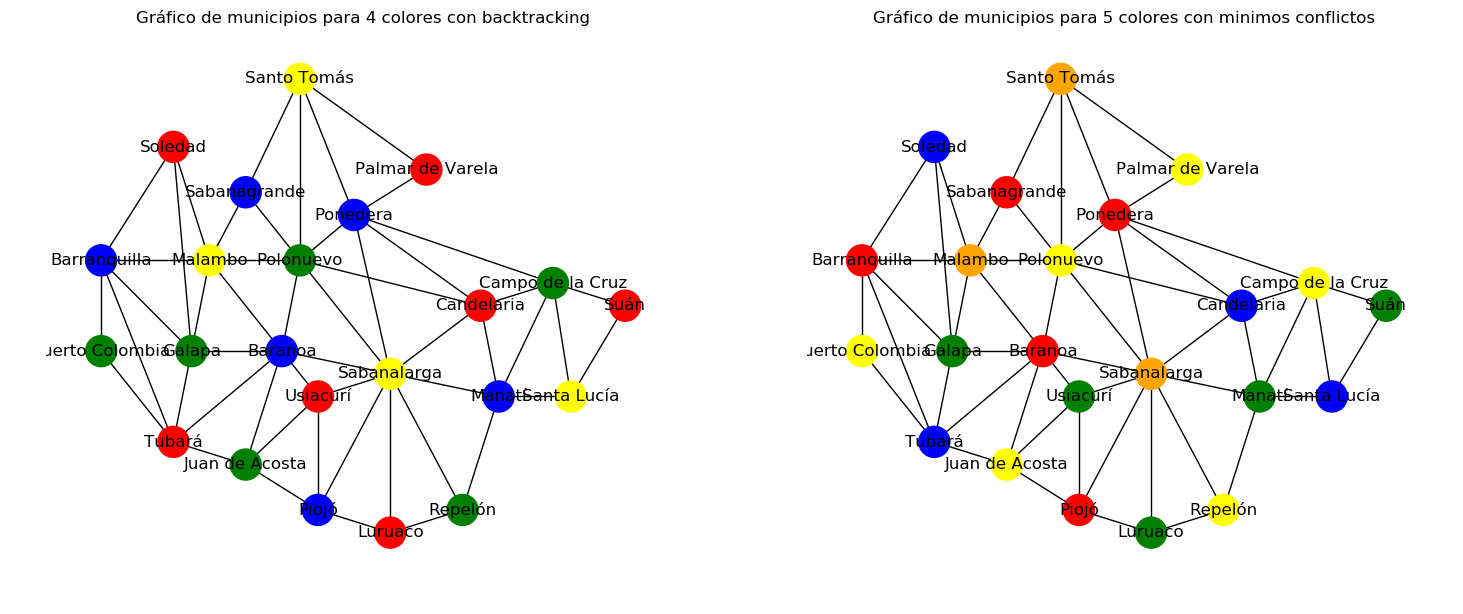

In [39]:
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
import matplotlib.pyplot as plt

etiqueta_mun = dict(enumerate(variables))
G=nx.Graph()

for i in range(len(etiqueta_mun)):
    G.add_node(i)

for k, v in restricciones :
    for item in k[1:] :
        G.add_edge(list(etiqueta_mun.values()).index(k[0]), list(etiqueta_mun.values()).index(item))

pos = {0: (0, 80), 1: (20, 105), 2: (0, 60), 3: (20, 40), 4: (25, 60), 
       5: (30, 80), 6: (40, 95), 7: (50, 60), 8: (55, 80), 9: (55, 120), 
       10: (90, 100), 11: (70, 90), 12: (105, 70), 13: (125, 75), 14: (145, 70), 
       15: (130, 50), 16: (110, 50), 17: (100, 25), 18: (80, 20), 19: (60, 25), 
       20: (40, 35), 21: (60, 50), 22: (80, 55)
      }

color_map_1 = []
color_map_2 = []
for node in G:
    color_map_1.append(resultado_1[etiqueta_mun[node]])
    color_map_2.append(resultado_2[etiqueta_mun[node]])

plt.figure(num=None, figsize=(18, 16), dpi=100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.title('Gráfico de municipios para 4 colores con backtracking')
nx.draw(G, pos, node_color = color_map_1, labels = etiqueta_mun, node_size=500)
plt.subplot(2,2,2)
plt.title('Gráfico de municipios para 5 colores con minimos conflictos')
nx.draw(G, pos, node_color = color_map_2, labels = etiqueta_mun, node_size=500)
plt.show()